# Movie Genre (Multi-label) Classification
<br>
<div style="text-align:right"><i>To open and run this notebook <b>online</b>, click here: <a href="https://mybinder.org/v2/gh/sergioburdisso/pyss3/master?filepath=examples/movie_genres.ipynb" target="_blank"><img src="https://mybinder.org/badge_logo.svg" style="display: inline"></a></i></div>

This is the notebook for the ["Movie Genre Classification (Multi-label Classification)"](https://pyss3.readthedocs.io/en/latest/tutorials/movie-genres.html) tutorial. In this notebook, we will see how we can use the [PySS3](https://github.com/sergioburdisso/pyss3) Python package to deploy models for Sentiment Analysis on Movie Reviews.

Let us begin! First, we need to import the modules we will be using:

---

The dataset we'll use is a subset of the [CMU Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/) with only 9 categories, 16933 training documents, and 5680 test documents (plot summaries)



In [6]:
%matplotlib inline

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span
from pyss3.server import Live_Test

In [4]:
!unzip -u datasets/movie_genres.zip -d datasets/

Archive:  datasets/movie_genres.zip


In [7]:
base_path = "datasets/movie_genres/"
train_path = base_path + "train/"
test_path = base_path + "test/"

x_train, y_train = Dataset.load_from_files_multilabel(train_path + "summaries.txt", train_path + "genres.txt")
x_test, y_test = Dataset.load_from_files_multilabel(test_path + "summaries.txt", test_path + "genres.txt")

100%|██████████| 5680/5680 [00:00<00:00, 146369.26it/s]


In [4]:
clf = SS3(0.4, 3, 0)

In [5]:
s, l, p, _ = clf.get_hyperparameters()

print("Smoothness(s):", s)
print("Significance(l):", l)
print("Sanction(p):", p)

Smoothness(s): 0.4
Significance(l): 3
Sanction(p): 0


In [6]:
clf.train(x_train, y_train)

Training: 100%|██████████| 16933/16933 [01:05<00:00, 260.44it/s]


Classification: 100%|██████████| 5680/5680 [00:00<00:00, 12317.93it/s] 



                 precision    recall  f1-score   support

       thriller       0.62      0.52      0.56      1632
          drama       0.55      0.77      0.64      2454
         horror       0.67      0.67      0.67      1020
   romance film       0.41      0.92      0.57      1666
         action       0.56      0.67      0.61      1467
      adventure       0.60      0.39      0.47       812
        fantasy       0.34      0.49      0.40       503
        musical       0.29      0.78      0.42       603
science fiction       0.60      0.68      0.64       584

      micro avg       0.50      0.69      0.58     10741
      macro avg       0.51      0.65      0.55     10741
   weighted avg       0.53      0.69      0.58     10741
    samples avg       0.56      0.71      0.58     10741


 Exact Match Ratio: 0.161
 Hamming Loss: 0.213


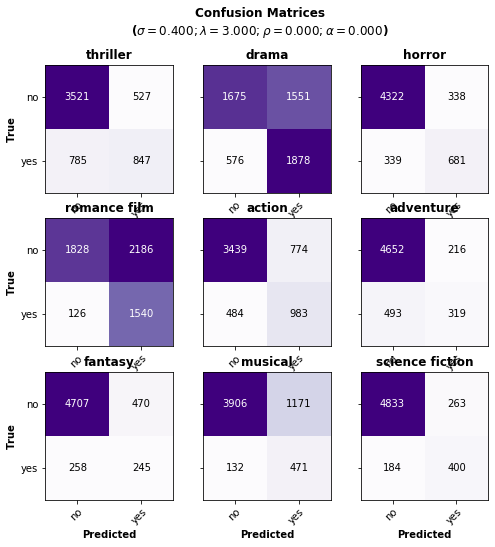

0.21269561815336463

In [7]:
Evaluation.test(clf, x_test, y_test)

In [8]:
Live_Test.run(clf, x_test[:50], y_test[:50])  # <- Unfortunately, if you're running the notebook online with 
                                              #    Binder, won't work, sorry :(

<p style="color:red">(!) To <b>STOP</b> the server, press <b>Esc</b> once and then the <b>i</b> key twice</p>
<p style="color:red"><u>NOTE</u>: Unfortunately, the Live Test will ONLY WORK if you run this notebook, locally, on your computer. Therefore, if you're using the online Binder version, won't work, sorry  :( ... a Live Test like <a href="http://tworld.io/ss3/live_test_online/#30305" target="_blank">this one</a> would have been opened up, locally, in your browser but using the model you just trained above.</p>

In [19]:
clf = SS3(0.4, 3, 0)

clf.train(x_train, y_train, n_grams=3)

Training: 100%|██████████| 16933/16933 [02:09<00:00, 130.74it/s]


predict could be 10 to 200 times slower using n-grams

Classification: 100%|██████████| 5680/5680 [02:09<00:00, 43.82it/s]



                 precision    recall  f1-score   support

       thriller       0.61      0.54      0.57      1632
          drama       0.52      0.84      0.64      2454
         horror       0.66      0.67      0.67      1020
   romance film       0.42      0.92      0.57      1666
         action       0.57      0.66      0.61      1467
      adventure       0.58      0.38      0.46       812
        fantasy       0.37      0.47      0.41       503
        musical       0.31      0.71      0.43       603
science fiction       0.61      0.67      0.64       584

      micro avg       0.50      0.70      0.58     10741
      macro avg       0.52      0.65      0.56     10741
   weighted avg       0.53      0.70      0.58     10741
    samples avg       0.56      0.72      0.58     10741


 Exact Match Ratio: 0.169
 Hamming Loss: 0.211
[ updating evaluations cache ]


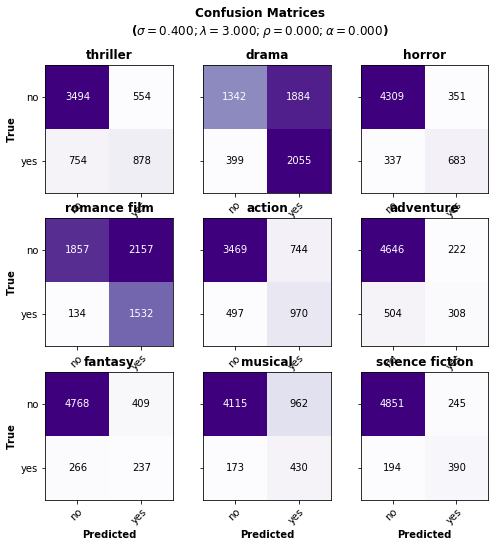

0.21099374021909234

In [10]:
Evaluation.test(clf, x_test, y_test)

In [11]:
Live_Test.run(clf, x_test[:50], y_test[:50])

# (!) Remember: to STOP the server, press `Esc` once and then the `I` key twice

In [12]:
Live_Test.set_testset_from_files_multilabel(base_path + "live_test/summaries/",
                                            base_path + "live_test/genres.txt")
Live_Test.run(clf)

# (!) Remember: to STOP the server, press `Esc` once and then the `I` key twice

Loading documents: 100%|██████████| 13/13 [00:00<00:00, 1818.50it/s]


---

# Hyperparameter Optimization

In [13]:
clf = SS3(name="movie-genres")

clf.train(x_train, y_train)

Training: 100%|██████████| 16933/16933 [01:07<00:00, 249.16it/s]


In [15]:
# the search should take 10-15 minutes
s_vals=span(.3, .6, 4)
l_vals=span(1, 5, 9)
p_vals=span(0, 1, 2)
best_s, best_l, best_p, _ = Evaluation.grid_search(
    clf, x_test, y_test,
    s=s_vals, l=l_vals, p=p_vals,
    metric="f1-score", tag="grid search (test)"  # <-- this tag argument is optional! >_<
)
print("The hyperparameter values that obtained the best Accuracy are:")
print("Smoothness(s):", best_s)
print("Significance(l):", best_l)
print("Sanction(p):", best_p)

Grid search: 100%|██████████| 72/72 [12:00<00:00, 10.01s/it]

The hyperparameter values that obtained the best Accuracy are:
Smoothness(s): 0.4
Significance(l): 3.0
Sanction(p): 0.0


In [16]:
# the search should take about 30 minutes
s_vals=span(.3, .6, 4)
l_vals=span(1, 5, 9)
best_s, best_l, best_p, _ = Evaluation.grid_search(
    clf, x_train, y_train,
    s=s_vals, l=l_vals, p=0,
    k_fold=4, metric="f1-score",
    tag="grid search (4-fold)"
)
print("The hyperparameter values that obtained the best Accuracy are:")
print("Smoothness(s):", best_s)
print("Significance(l):", best_l)
print("Sanction(p):", best_p)

[fold 4/4] Grid search: 100%|██████████| 36/36 [06:25<00:00, 10.72s/it]

The hyperparameter values that obtained the best Accuracy are:
Smoothness(s): 0.4
Significance(l): 3.0
Sanction(p): 0.0


### Interactive 3D Evaluation Plot

The ``Evaluation`` class comes with a really useful function, ``Evaluation.plot()``, that we can use to create an interactive 3D evaluation plot (We highly recommend reading this [brief section](https://pyss3.rtfd.io/en/latest/user_guide/visualizations.html#evaluation-plot), from the documentation, in which it is briefly described). Instead of using the single value returned from the ``Evaluation.grid_search()`` we could use this plot to have a broader view of the relationship between the different hyperparameter values and the performance of our model in the task being addressed. The ``Evaluation.plot()`` function creates a portable HTML file containing the interactive plot for us, and then opens it up in your browser. Let's give it a shot:

In [17]:
Evaluation.plot()

True

In [18]:
!ls

custom_preprocessing.ipynb  pyss3
datasets		    README.md
extract_insight.ipynb	    ss3_model_evaluation[movie-summaries].html
imgs			    ss3_models
movie_genre.ipynb	    topic_categorization.ipynb
movie_review.ipynb
